In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv('nacimientos.csv')
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provincia_id          5632 non-null   float64
 1   provincia_nombre      5643 non-null   object 
 2   departamento_id       5621 non-null   float64
 3   departamento_nombre   5632 non-null   object 
 4   anio                  5643 non-null   int64  
 5   nacimientos_cantidad  5643 non-null   int64  
 6   poblacion_total       5643 non-null   int64  
 7   tbn                   5643 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 352.8+ KB


provincia_id            11
provincia_nombre         0
departamento_id         22
departamento_nombre     11
anio                     0
nacimientos_cantidad     0
poblacion_total          0
tbn                      0
dtype: int64

copie todo lo del integrador y solamente cambie el filtro y el drop


In [74]:
fil=df.loc[(df.provincia_nombre=='Buenos Aires')|(df['provincia_nombre']=='Tierra del Fuego')|(df['provincia_nombre']=='Mendoza')].copy()
fil.drop(['provincia_id','departamento_nombre','departamento_id'], axis='columns', inplace=True)
fil['%_nacimientos']=np.round(fil["nacimientos_cantidad"]/fil.poblacion_total*100,2)
fil=fil.groupby(['provincia_nombre', 'anio'])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
fil

C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\353534542.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fil=fil.groupby(['provincia_nombre', 'anio'])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()


,provincia_nombre,anio,nacimientos_cantidad,poblacion_total,%_nacimientos
0,Buenos Aires,2012,289720,16100397,226.11
1,Buenos Aires,2013,290116,16289508,226.56
2,Buenos Aires,2014,293943,16476201,229.36
3,Buenos Aires,2015,283863,16660140,222.12
4,Buenos Aires,2016,268841,16841517,213.19
5,Buenos Aires,2017,260846,17020578,204.52
6,Buenos Aires,2018,253242,17197160,198.41
7,Buenos Aires,2019,228455,17371119,180.38
8,Buenos Aires,2020,201232,17542343,160.91
9,Buenos Aires,2021,179490,17711043,144.24


* Filtro por cada provicia, lo saco a otro dataframe junto con las coumnas necesarias
* Calculo el porcentaje una vez agrupado por el nombre y la provincia
* Luego sumo la cantidad de nacimientos y poblacion total para al final sacar el porcentaje por cada una de las provincias

In [72]:
BsAs=pd.DataFrame(fil[fil.provincia_nombre=="Buenos Aires"]).set_index('anio')
BsAs=BsAs.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
BsAs['%_nacimientos']=np.round(BsAs["nacimientos_cantidad"]/BsAs.poblacion_total*100,2)

TieFue=pd.DataFrame(fil[fil.provincia_nombre=="Tierra del Fuego"]).set_index('anio')
TieFue=TieFue.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
TieFue['%_nacimientos']=np.round(TieFue["nacimientos_cantidad"]/TieFue.poblacion_total*100,2)

Mend=pd.DataFrame(fil[fil.provincia_nombre=="Mendoza"]).set_index("anio")
Mend=Mend.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
Mend['%_nacimientos']=np.round(Mend["nacimientos_cantidad"]/Mend.poblacion_total*100,2)

C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\1801734206.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BsAs=BsAs.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\1801734206.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TieFue=TieFue.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()
C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\1801734206.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Mend=Mend.groupby(["provincia_nombre","anio"])["nacimientos_cantidad","poblacion_total","%_nacimientos"].sum().reset_index()


Cantidad de nacimientos concatenados de las 3 provincias y con el grafico

In [29]:
ProvNac=pd.concat((BsAs.anio,BsAs.nacimientos_cantidad,TieFue.nacimientos_cantidad,Mend.nacimientos_cantidad),axis=1, keys=["Año","Buenos Aires","Tierra del Fuego","Mendoza"] )
ProvNac

,Año,Buenos Aires,Tierra del Fuego,Mendoza
0,2012,289720,2790,33069
1,2013,290116,2851,33353
2,2014,293943,3025,35598
3,2015,283863,2948,33935
4,2016,268841,2872,32162
5,2017,260846,2656,30381
6,2018,253242,2661,29638
7,2019,228455,2349,26692
8,2020,201232,1897,23538
9,2021,179490,1655,21887


<AxesSubplot:xlabel='Año'>

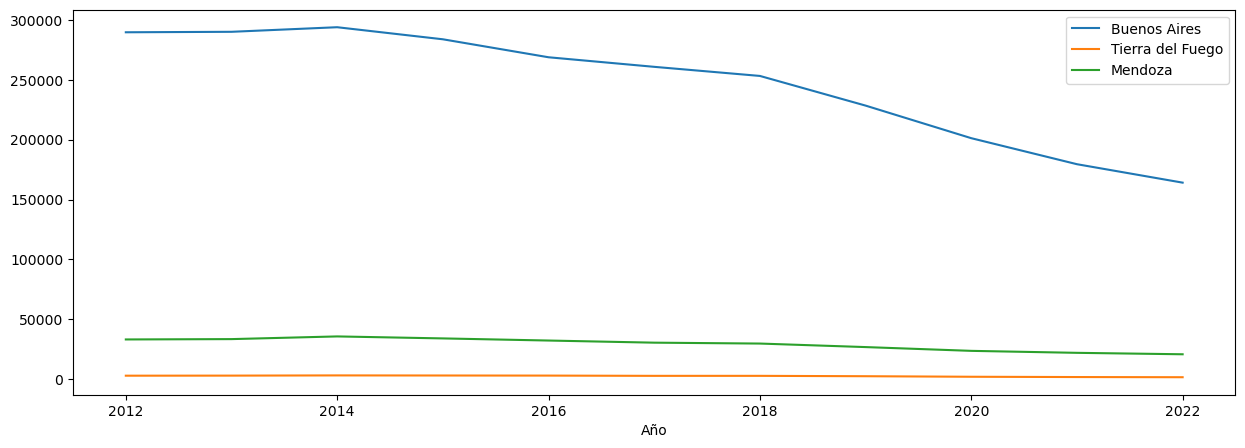

In [30]:
ProvNac.plot(figsize=(15,5), x="Año")

Concatenacion de las 3 provincias por porcentaje y lo grafico

<AxesSubplot:xlabel='Año'>

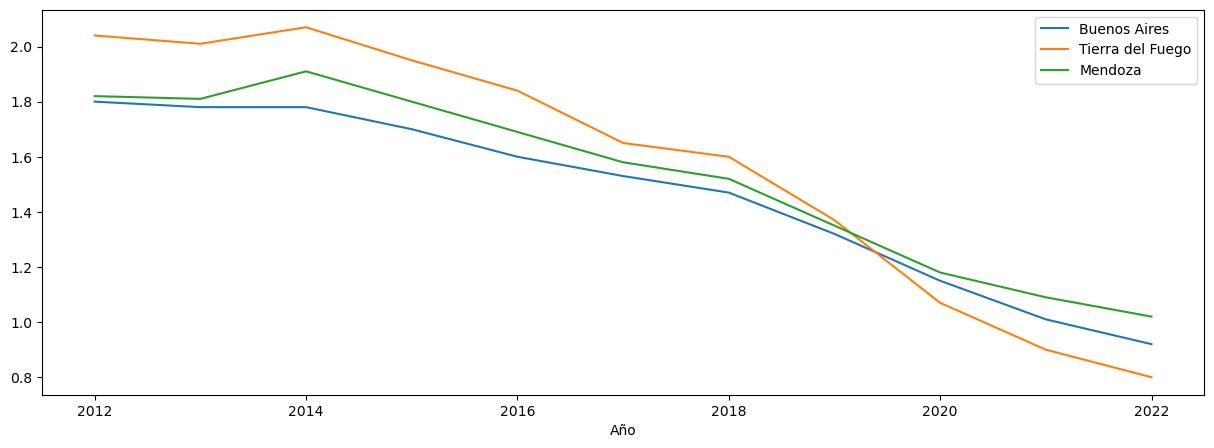

In [73]:
ProvPor=pd.concat((BsAs.anio,BsAs["%_nacimientos"],TieFue["%_nacimientos"],Mend["%_nacimientos"]),axis=1, keys=["Año","Buenos Aires","Tierra del Fuego","Mendoza"] )
ProvPor.plot(figsize=(15,5),x="Año")

Concatenacion de las 3 provincias por la poblacion total y a su vez lo grafico

<AxesSubplot:xlabel='Año'>

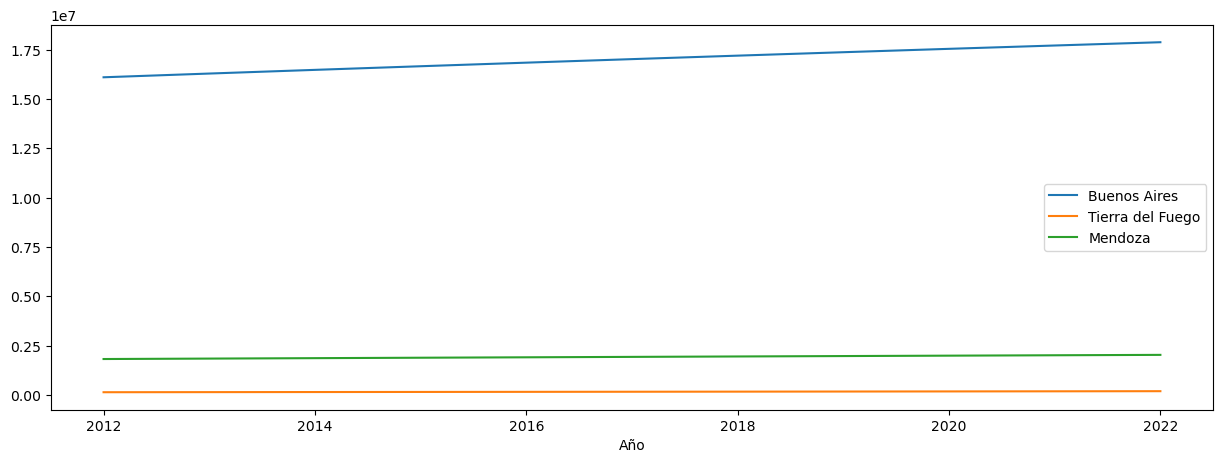

In [32]:
ProvPob=pd.concat((BsAs.anio,BsAs.poblacion_total,TieFue.poblacion_total,Mend.poblacion_total),axis=1, keys=["Año","Buenos Aires","Tierra del Fuego","Mendoza"] )
ProvPob.plot(figsize=(15,5),x="Año")

In [33]:
Piv=fil.pivot(index="anio",columns="provincia_nombre",values=["nacimientos_cantidad","%_nacimientos","poblacion_total"])
NacxAño1=Piv.loc[2020:2023,'nacimientos_cantidad'].sum()
NacxAño2=Piv.loc[2012:2015,'nacimientos_cantidad'].sum()
Compara=pd.concat((NacxAño1,NacxAño2),axis=1,keys=["2020-2022", "2012-2014"])
Compara

,2020-2022,2012-2014
provincia_nombre,,
Buenos Aires,544803.0,1157642.0
Mendoza,66108.0,135955.0
Tierra del Fuego,5062.0,11614.0


C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\149078199.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(Compara.index,rotation=45, ha="right")
C:\Users\ea873\AppData\Local\Temp\ipykernel_16480\149078199.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(Compara.index,rotation=45, ha="right")


[Text(0, 0, 'Buenos Aires'),
 Text(1, 0, 'Mendoza'),
 Text(2, 0, 'Tierra del Fuego')]

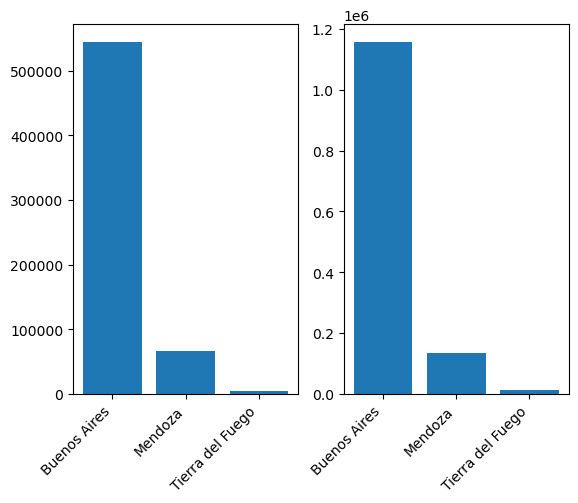

In [58]:
import matplotlib.pyplot as plt
fig,axis=plt.subplots(1,2)

axis[0].bar(Compara.index,Compara["2020-2022"])
axis[0].set_xticklabels(Compara.index,rotation=45, ha="right")

axis[1].bar(Compara.index, Compara["2012-2014"])
#axis[1].set_ylim(10000,1257642.0)
axis[1].set_xticklabels(Compara.index,rotation=45, ha="right")

<AxesSubplot:xlabel='provincia_nombre'>

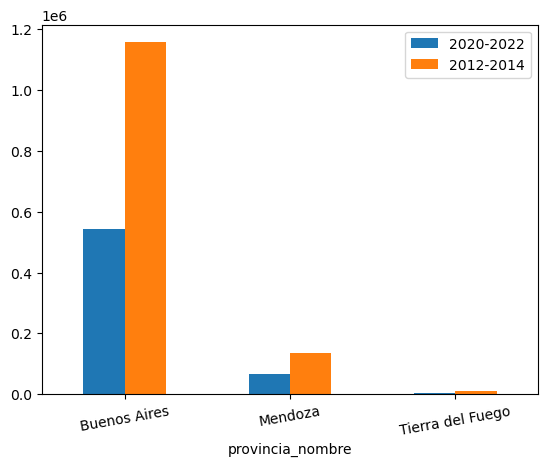

In [76]:
Compara.plot.bar(rot=10)